In [133]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import seaborn as sns 

### READING THE CSV FILE INTO A DATAFRAME

In [115]:
df= pd.read_csv('winequality-red.csv',sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## EXPLORING THE DATASET 

In [116]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [117]:
df.shape

(1599, 12)

In [118]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

### Checking for null values 

In [119]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Using Seaborn's heatmap to visualise the correlation between the different columns available 

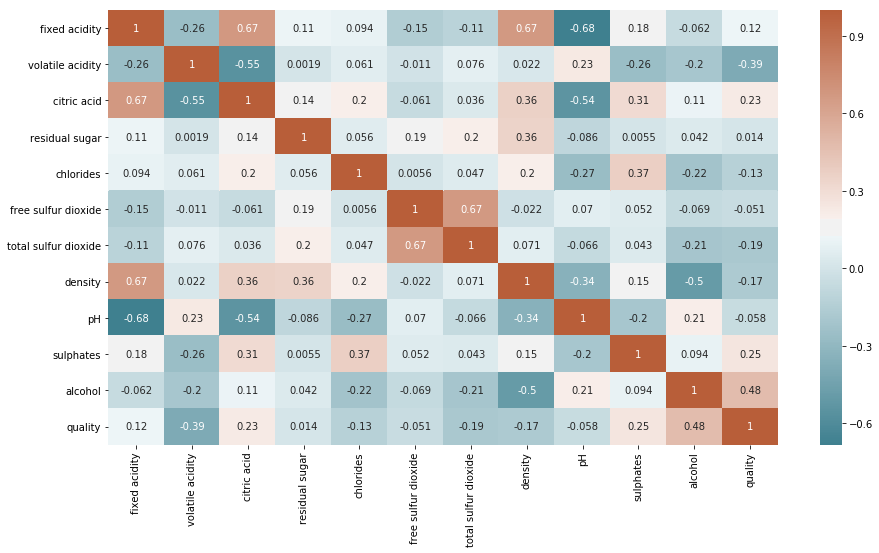

In [120]:
corr= df.corr()
plt.subplots(figsize=(15,8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(215, 25, as_cmap=True))
plt.show()

### Printing coefficients of each feature (relating to the target variable)

In [121]:

correlations = df.corr()['quality'].drop('quality')
print(correlations)

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64


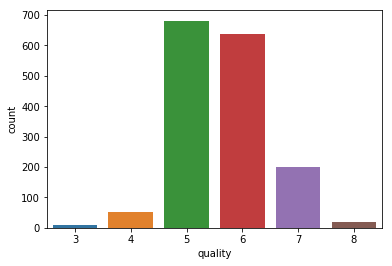

In [122]:
sns.countplot(df['quality'])
plt.show()

## Feature engineering 

In [123]:
cols_to_drop=[]
def filter_cols(threshold):
    abs_corr= correlations.abs()
    for i in abs_corr:
        if i < threshold:
            cols_to_drop.append(i)
    return cols_to_drop        


In [124]:
filter_cols(0.05)

[0.013731637340066346]

In [125]:
df.drop('residual sugar',axis=1,inplace=True)

### Converting to a classification problem by categorizing 'quality' into good and bad by setting a threshold of 7 

In [126]:

bins = (2, 6.8, 8)
category = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = category)


In [127]:
dict1= {'bad':0,'good':1}
df['quality']= df['quality'].map(dict1)

In [128]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [129]:
X= df.drop('quality',axis='columns')
y= df['quality']

### Standardizing Feature Variables

In [130]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X.values.reshape(-1, 1))
scaler.fit_transform(X.values.reshape(-1, 1))

array([[-0.07418859],
       [-0.45838917],
       [-0.49852953],
       ...,
       [-0.3041355 ],
       [-0.4606829 ],
       [ 0.13224754]])

### Splitting the data into train and test set 

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)

In [132]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1119, 10)
(480, 10)
(1119,)
(480,)


# MODELLING and PREDICTION 

### Decision Tree Classifier

In [161]:
#DECISION TREE
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)
y_pred = model_tree.predict(X_test)

accuracy_dc= model_tree.score(X_test,y_test)
accuracy_dc1= round(accuracy_dc*100 ,2)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       415
           1       0.48      0.52      0.50        65

   micro avg       0.86      0.86      0.86       480
   macro avg       0.70      0.72      0.71       480
weighted avg       0.86      0.86      0.86       480



### Random Forest Classifier 

In [162]:
#RANDOM FOREST CLASSIFIER 
from sklearn.ensemble import RandomForestClassifier
model_randomF = RandomForestClassifier()
model_randomF.fit(X_train, y_train)
y_pred2 = model_randomF.predict(X_test)

accuracy_rf= model_randomF.score(X_test,y_test)
accuracy_rf1= round(accuracy_rf*100 ,2)

print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       415
           1       0.67      0.34      0.45        65

   micro avg       0.89      0.89      0.89       480
   macro avg       0.79      0.66      0.69       480
weighted avg       0.87      0.89      0.87       480



C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### K Neighbors Classifier 

In [167]:
#KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=6)
model_knn.fit(X_train,y_train)
ypred3= model_knn.predict(X_test)

accuracy_knn= model_knn.score(X_test,y_test)
accuracy_knn1= round(accuracy_knn*100 ,2)
print(classification_report(y_test,ypred3))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       415
           1       0.31      0.06      0.10        65

   micro avg       0.85      0.85      0.85       480
   macro avg       0.59      0.52      0.51       480
weighted avg       0.79      0.85      0.81       480



### Support Vector Classifier

In [164]:
#Support Vector Classifier 
from sklearn.svm import SVC
model_svc = SVC(kernel='rbf')
model_svc.fit(X_train, y_train)
ypred4 = model_svc.predict(X_test)

accuracy_SVC= model_svc.score(X_test,y_test)
accuracy_SVC1= round(accuracy_SVC*100 ,2)
print(classification_report(y_test,ypred4))


              precision    recall  f1-score   support

           0       0.88      0.99      0.93       415
           1       0.67      0.15      0.25        65

   micro avg       0.88      0.88      0.88       480
   macro avg       0.77      0.57      0.59       480
weighted avg       0.85      0.88      0.84       480



C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Naive Bayes Classifier

In [165]:
#Naive Bayes Classification 
from sklearn.naive_bayes import GaussianNB
model_NB= GaussianNB()
model_NB.fit(X_train,y_train)
ypred5=model_NB.predict(X_test)

accuracy_NB= model_NB.score(X_test,y_test)
accuracy_NB1= round(accuracy_NB*100 ,2)
print(classification_report(y_test,ypred5))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90       415
           1       0.44      0.65      0.52        65

   micro avg       0.84      0.84      0.84       480
   macro avg       0.69      0.76      0.71       480
weighted avg       0.87      0.84      0.85       480



### Printing accuracy of all models 

In [168]:
results = pd.DataFrame({
    'Model' : ['Decision tree','Random Forest','KNN','SVC', 'Naive Bayes'],
    'Score' : [accuracy_dc1, accuracy_rf1, accuracy_knn1, accuracy_SVC1, accuracy_NB1]
})

In [169]:
results.set_index('Model')

,Score
Model,
Decision tree,85.83
Random Forest,88.75
KNN,85.42
SVC,87.50
Naive Bayes,83.96


# THANK YOU :)